# Wednesday, February 26, 2025

In [ ]:
import pandas as pd  # Use to read file
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = pd.read_csv('SC3seq_Cy_ProcessedData.txt', sep='\t')
df.head()

,macFas5_entrez_id,macFas5_gene_symbol,C6FF_MS11T85,C6FF_MS11T86,C6FF_MS11T87,C6FF_MS11T88,C6FF_MS11T89,C6FF_MS11T91,C6FF_MS11T92,C6FF_MS11T94,...,E09_MS03T84,E09_MS03T86,E09_MS03T87,E09_MS03T90,E09_MS03T94,E13_MS13T65,E14_MS09T18,E16_MS09T29,E16_MS09T31,E17_MS13T91
0,102116043,LOC102116043,5.92983,1.60194,4.205700,3.19590,15.2104,3.54897,0.406812,0.619385,...,0.391435,1.30057,10.11480,8.819130,1.46659,0.748895,1.505210,2.32114,1.61343,1.7363
1,102114891,PGBD2,0.00000,22.42710,0.262856,2.79641,11.0621,4.87984,0.000000,2.477540,...,0.000000,0.00000,0.00000,5.039510,14.66590,0.374448,0.000000,6.18971,0.00000,0.0000
2,102116795,ZNF692,50.40350,34.44160,4.468550,0.00000,0.0000,0.00000,7.729430,0.000000,...,0.391435,6.50284,17.84970,0.419959,0.00000,0.000000,0.000000,51.83880,0.00000,0.0000
3,102117637,ZNF672,0.00000,19.22320,0.000000,83.09350,66.8334,28.83540,38.647100,3.096920,...,28.183300,16.04030,26.17950,2.519750,16.62130,17.973500,25.588600,23.21140,69.37750,92.4579
4,102119506,SH3BP5L,0.00000,4.80581,2.102850,1.19846,29.0380,11.09050,11.390700,53.886500,...,7.828700,15.17330,7.13987,5.879420,19.06560,18.347900,0.752605,0.00000,0.00000,23.4400


In [ ]:
df.shape  # Describe dimensions of dataframe (row, columns)

(27775, 423)

In [ ]:
df.loc[0, 'C6FF_MS11T86']  # Find value. Args = row, column

1.60194

In [ ]:
df.iloc[0, 0]

102116043

In [ ]:
# Drop the first column of df
df = df.iloc[:, 1:]  # Select all rows, and all columns except first one.

# Set the macFas5_gene_symbol column to be the row names
df.index = df['macFas5_gene_symbol']

# Drop the macFas5_gene_symbol column
df = df.drop('macFas5_gene_symbol', axis = 1)

df.head()

,C6FF_MS11T85,C6FF_MS11T86,C6FF_MS11T87,C6FF_MS11T88,C6FF_MS11T89,C6FF_MS11T91,C6FF_MS11T92,C6FF_MS11T94,C6FF_MS11T95,C6oF_MS05T53,...,E09_MS03T84,E09_MS03T86,E09_MS03T87,E09_MS03T90,E09_MS03T94,E13_MS13T65,E14_MS09T18,E16_MS09T29,E16_MS09T31,E17_MS13T91
macFas5_gene_symbol,,,,,,,,,,,,,,,,,,,,,
LOC102116043,5.92983,1.60194,4.205700,3.19590,15.2104,3.54897,0.406812,0.619385,4.75850,18.91270,...,0.391435,1.30057,10.11480,8.819130,1.46659,0.748895,1.505210,2.32114,1.61343,1.7363
PGBD2,0.00000,22.42710,0.262856,2.79641,11.0621,4.87984,0.000000,2.477540,0.00000,5.40363,...,0.000000,0.00000,0.00000,5.039510,14.66590,0.374448,0.000000,6.18971,0.00000,0.0000
ZNF692,50.40350,34.44160,4.468550,0.00000,0.0000,0.00000,7.729430,0.000000,9.04116,46.47120,...,0.391435,6.50284,17.84970,0.419959,0.00000,0.000000,0.000000,51.83880,0.00000,0.0000
ZNF672,0.00000,19.22320,0.000000,83.09350,66.8334,28.83540,38.647100,3.096920,72.32930,14.58980,...,28.183300,16.04030,26.17950,2.519750,16.62130,17.973500,25.588600,23.21140,69.37750,92.4579
SH3BP5L,0.00000,4.80581,2.102850,1.19846,29.0380,11.09050,11.390700,53.886500,0.00000,8.10545,...,7.828700,15.17330,7.13987,5.879420,19.06560,18.347900,0.752605,0.00000,0.00000,23.4400


<Axes: >

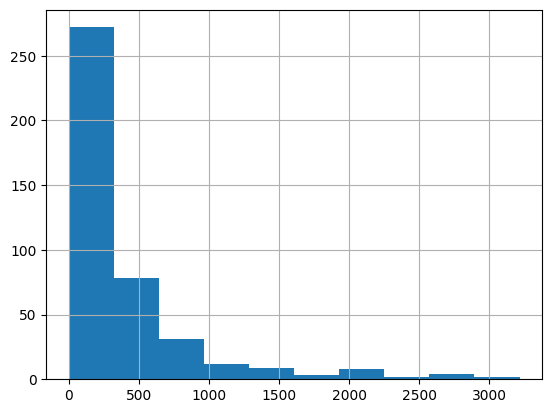

In [ ]:
df.loc['NANOG', :]  # or df.loc['NANOG']

# Plot values in the row NANOG in df as a histogram
df.loc['NANOG', :].hist()


In [ ]:
# Typically use log transform for genetic data. Paper describes how it's done.
# Log transform values in df
df = df.apply(lambda x: np.log2(x + 1))

# Adds 1 b/c some values are 0 and therefore aren't computable in log.
# Paper uses log2. Default Google Colab used log10.

df.head()

# Suggestion: should have saved log-transformed dataframe into new variable.

,C6FF_MS11T85,C6FF_MS11T86,C6FF_MS11T87,C6FF_MS11T88,C6FF_MS11T89,C6FF_MS11T91,C6FF_MS11T92,C6FF_MS11T94,C6FF_MS11T95,C6oF_MS05T53,...,E09_MS03T84,E09_MS03T86,E09_MS03T87,E09_MS03T90,E09_MS03T94,E13_MS13T65,E14_MS09T18,E16_MS09T29,E16_MS09T31,E17_MS13T91
macFas5_gene_symbol,,,,,,,,,,,,,,,,,,,,,
LOC102116043,2.792820,1.379588,2.380092,2.068980,4.018848,2.185540,0.492430,0.695446,2.525693,4.315617,...,0.476574,1.201991,3.474410,3.295595,1.302518,0.806444,1.324932,1.731679,1.385945,1.452226
PGBD2,0.000000,4.550106,0.336690,1.924636,3.592409,2.555777,0.000000,1.798067,0.000000,2.678890,...,0.000000,0.000000,0.000000,2.594432,3.969556,0.458852,0.000000,2.845934,0.000000,0.000000
ZNF692,5.683795,5.147372,2.451158,0.000000,0.000000,0.000000,3.125887,0.000000,3.327854,5.568981,...,0.476574,2.907437,4.236470,0.505849,0.000000,0.000000,0.000000,5.723526,0.000000,0.000000
ZNF672,0.000000,4.337939,0.000000,6.393922,6.083924,4.898953,5.309143,2.034540,6.196318,3.962531,...,4.867071,4.090879,4.764447,1.815473,4.139248,4.245914,4.732736,4.597615,6.137042,6.546245
SH3BP5L,0.000000,2.537497,1.633594,1.136493,4.908717,3.595802,3.631186,5.778379,0.000000,3.186730,...,3.142201,4.015542,3.025006,2.782287,4.326652,4.274105,0.809501,0.000000,0.000000,4.611172


<Axes: >

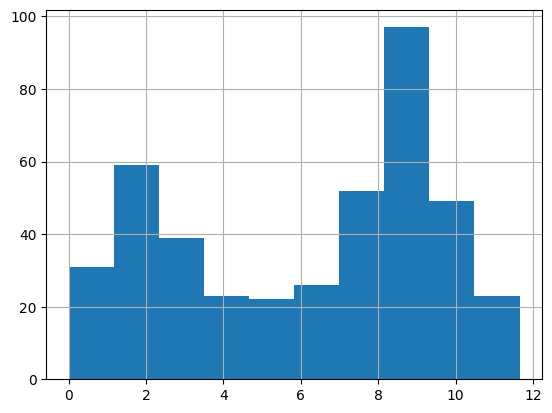

In [ ]:
df.loc['NANOG', :].hist()

In [ ]:
df.loc['NANOG', :].mean()  # Mean expression of NANOG across all values.

6.144291461562796

In [ ]:
# Count column names containing 'E06'
df.loc['NANOG', df.columns.str.contains('E06')].shape

(43,)

7.546735736469379


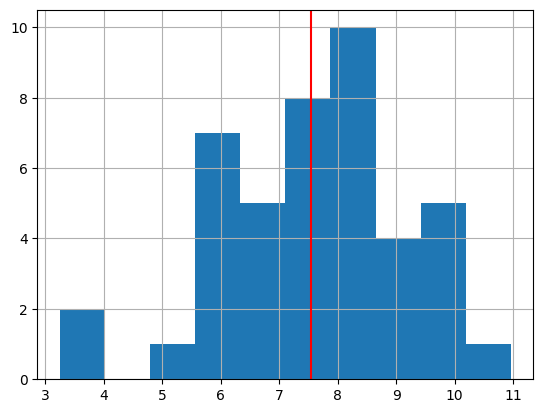

In [ ]:
# Store NANOG data at E06
nanog_e06 = df.loc['NANOG', df.columns.str.contains('E06')]

# plot a histogram for nanog_e06
nanog_e06.hist()
print(nanog_e06.mean())

# plot a vertical line indicating the mean
plt.axvline(nanog_e06.mean(), color='r')  # or color = 'red'

In [ ]:
observed_mean = nanog_e06.mean()

# Randomly draw 43 elements from nanog_e06 with replacement
mean_random = nanog_e06.sample(43, replace=True).mean()
print(observed_mean, mean_random)

# Create an array with 1000 0s
means_random = np.zeros(1000)

# Loop 1000 times
for i in range(1000):
  mean_random = nanog_e06.sample(43, replace=True).mean()
  means_random[i] = mean_random

print(mean_random)

7.546735736469379 7.63373536597211
8.23365163489438


Formula 0.24730345084978206
Simulation 0.24043030118421327


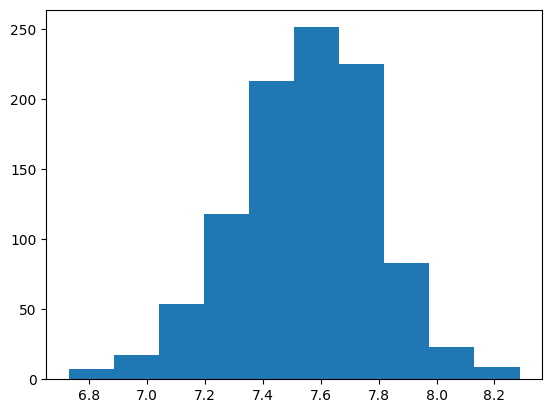

In [ ]:
# Plot the sampling distribution of the mean
plt.hist(means_random)

# Standard error of the mean:
sem = nanog_e06.sem()
print("Formula", sem)

# Standard error of the mean from simulation:
print("Simulation", means_random.std())

In [ ]:
gp1 = df.loc['CDX2', df.columns.str.contains('E06')]
gp2 = df.loc['CDX2', df.columns.str.contains('E09')]
print(gp1.shape, gp2.shape)
print(gp1.mean(), gp2.mean())

(43,) (20,)
2.765014053387081 4.539209417869569


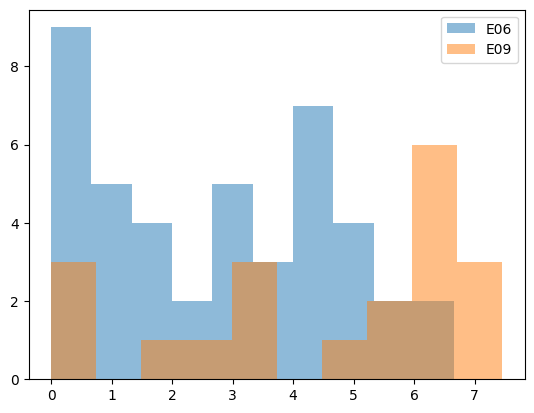

In [ ]:
plt.hist(gp1, label = 'E06', alpha = 0.5)
plt.hist(gp2, label = 'E09', alpha = 0.5)
plt.xlabel('Expression log2(RPKM)')
plt.ylabel('Frequency')
plt.legend()

In [ ]:
# Perform a t test for gp1 and gp2
res = stats.ttest_ind(gp1, gp2)
print(res.pvalue)
# Statistically significant, because <0.05

0.0033575625699156803


In [ ]:
combined_data = pd.concat([gp1, gp2])
combined_data.shape

(63,)

-1.774195364482488


(array([ 11.,  39., 110., 169., 226., 244., 135.,  43.,  21.,   2.]),
 array([-1.85611686, -1.46021168, -1.06430651, -0.66840133, -0.27249616,
         0.12340901,  0.51931419,  0.91521936,  1.31112453,  1.70702971,
         2.10293488]),
 <BarContainer object of 10 artists>)

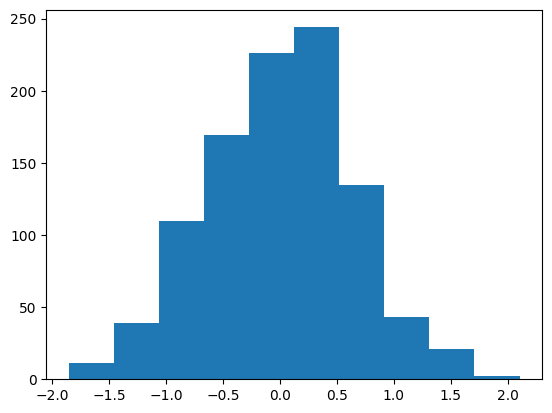

In [ ]:
observed_diff = gp1.mean() - gp2.mean()
print(observed_diff)

diffs = np.zeros(1000) # Is going be the sampling distribution of the difference
for i in range(1000):
  # Randomly choose 43 data points from combined_data
  sim_gp1 = combined_data.sample(43, replace=True)  # Can use replacement but don't have to
  sim_gp2 = combined_data.sample(20, replace=True)
  sim_diff = sim_gp1.mean() - sim_gp2.mean()
  # print(sim_diff)
  diffs[i] = sim_diff

plt.hist(diffs)

In [ ]:
# p-values:
(diffs < observed_diff).sum() / 1000

0.002

In [ ]:
# log2FC > 1 or log2GC < -1 (negative = down-regulated)
# p < 0.05
# It is a differentially expressed gene

print(observed_diff)

-1.774195364482488